In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [0]:
%cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
%cd data

/content/drive/My Drive/Colab Notebooks/data


In [0]:
!ls


News_Category_Dataset_v2.json


In [0]:
import pandas as pd
import numpy as np
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.linear_model import SGDClassifier
import logging
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [0]:
data_news = pd.read_json("News_Category_Dataset_v2.json", lines=True)[['category','headline','authors','short_description']]
data_news.columns
data_news.head()

,category,headline,authors,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,"The ""Dietland"" actress said using the bags is ..."


In [0]:
data_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 4 columns):
category             200853 non-null object
headline             200853 non-null object
authors              200853 non-null object
short_description    200853 non-null object
dtypes: object(4)
memory usage: 6.1+ MB


In [0]:
data_news.shape

(200853, 4)

In [0]:
data_news.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [0]:
data_news.authors.value_counts()

                                                                                          36620
Lee Moran                                                                                  2423
Ron Dicker                                                                                 1913
Reuters, Reuters                                                                           1562
Ed Mazza                                                                                   1322
                                                                                          ...  
Alice Hines and Mark Gongloff                                                                 1
Brian Castrucci, ContributorChief Program and Strategy Officer, de Beaumont Foundation        1
Edward J. Black, Contributor\nContributor                                                     1
Lisa Bloom, Contributor\nAttorney and bestselling author                                      1
Stephen Maloney, ContributorWriter and e

In [0]:
len(data_news['category'].unique())

41

In [0]:
len(data_news['authors'].unique())

27993

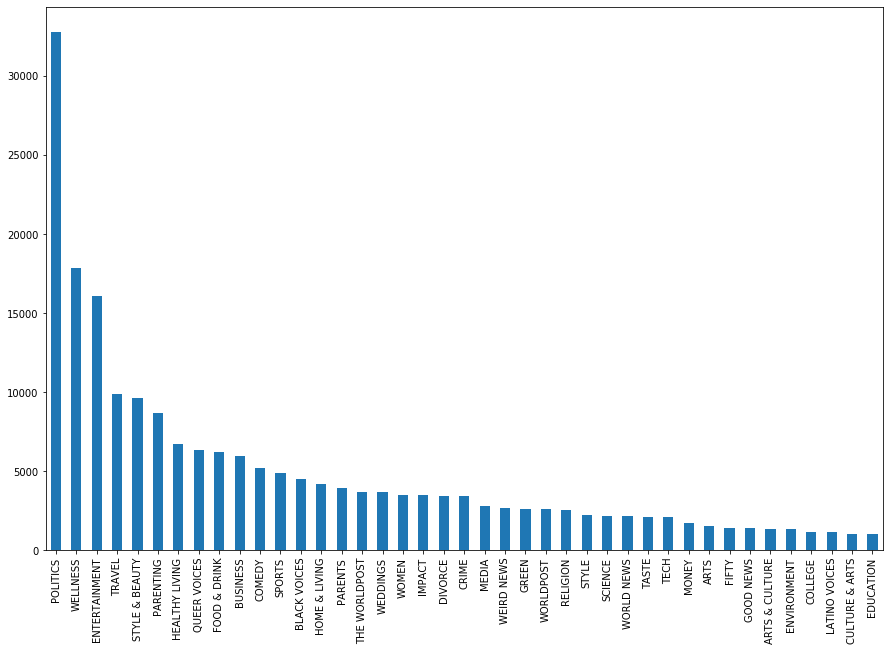

In [0]:
data_news['category'].value_counts().plot( kind='bar', figsize=(15,10))

In [0]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
stop_words = set(stopwords.words('english'))
word_net = WordNetLemmatizer()

my_words = ['make', 'amp', 'news', 'new', 'time', 'u', 's',
         'photos', 'get', 'say']


In [0]:
def black_txt(token):

  token_stop_words = token not in stop_words
  token_list = token not in list(string.punctuation)
  token_my_sw = token not in my_sw
  return token_stop_words and token_list, len(token)>2, token_my_sw

In [0]:
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "", text)
  text = re.sub("(\\d|\\W)+"," ", text)
  clean_text = [wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

In [0]:
data_news.short_description[2]

'The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.'

In [0]:
# Processing the Data and Tf-IDF


In [0]:
data_news.category = data_news.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)

In [0]:
data_news['text'] = data_news['headline'] + " " + data_news['short_description']

In [0]:
data_news.text[10]


'Justin Timberlake Visits Texas School Shooting Victims The pop star also wore a "Santa Fe Strong" shirt at his show in Houston.'

In [0]:
clean_txt(data_news.text[10])

'justin timberlake visit texas school shoot victims the pop star also wear a santa fe strong shirt at his show in houston'

In [0]:
clean_txt(data_news.text[200000])

'how a swiss army knife mean love to editor brie dyas to say that i plan on move out at the first chance be an understatement though im lucky to have a great relationship'

In [0]:
blob = TextBlob(data_news.text[200000])
str(blob.correct())

"Now A Swiss Army Knife Means 'Love' To Editor Erie Was To say that I planned on moving out at the first chance is an understatement. Though I'm lucky to have a great relationship"

In [0]:
def polarity_txt(text):
  return TextBlob(text).sentiment[0]

In [0]:
def subj_txt(text):
  return TextBlob(text).sentiment[1]

In [0]:
def len_text(text):
  if len(text.split()) > 0:
    return len(set(clean_txt(text).split())) / len (text.split())
  else:
    return 0

In [0]:
data_news['polarity'] = data_news['text'].apply(polarity_txt)
data_news.head(1)

,category,headline,authors,short_description,text,polarity
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,-0.05


In [0]:
data_news['subjectivity'] = data_news['text'].apply(subj_txt)
data_news.head(1)

,category,headline,authors,short_description,text,polarity,subjectivity
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,-0.05,0.266667


In [0]:
data_news['len'] = df_news['text'].apply(len_text)
data_news.head(1)

,category,headline,authors,short_description,text,polarity,subjectivity,len
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,-0.05,0.266667,0.888889


In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer

class ItemSelector(BaseEstimator, TransformerMixin):
  def __init__(self, key):
    self.key = key
  
  def fit(self, x, y=None):
    return self
  
  def transform(self, data_dict):
    return data_dict[self.key]

class TextStats(BaseEstimator, TransformerMixin):
  """Extract features from each document for DictVectorizer"""

  def fit(self, x, y=None):
    return self
  
  def transform(self, data):
    return [{'pos': row['polarity'], 'sub': row['subjectivity'], 'len': row['len']} for _, row in data.iterrows()]

In [0]:
# Pipe Line

pipeline = Pipeline([
    ('union', FeatureUnion(
        transformer_list=[
                          
            ('text', Pipeline([
                ('selector', ItemSelector(key='text')),
                ('tfidf', TfidfVectorizer( min_df=3, max_df=0.2, max_features=None,
                    strip_accents = 'unicode', analyzer='word',token_pattern=r'\w{1,}',
                    ngram_range=(1, 10), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words=None, preprocessor=clean_txt)),
            ])),

            ('stats', Pipeline([
                  ('selector', ItemSelector(key=['polarity', 'subjectivity', 'len'])),
                  ('stats', TextStats()),
                  ('vect', DictVectorizer()),
            ])),

        ],

        transformer_weights = {
            'text':0.9,
            'stats':1.5,
        },

    ))
    
])

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

seed = 40
X = data_news[['text', 'polarity', 'subjectivity', 'len']]
y = data_news['category']

encoder = LabelEncoder()
y = encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [0]:
pipeline.fit(x_train)

Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('text',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  ItemSelector(key='text')),
                                                                 ('tfidf',
                                                                  TfidfVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                                                  encoding='utf-8',
                      

In [0]:
%%time
train_vec = pipeline.transform(x_train)
test_vec = pipeline.transform(x_test)
print("Checking that the number of features in train and test correspond: %s - %s" % (train_vec.shape, test_vec.shape))

Checking that the number of features in train and test correspond: (160682, 490082) - (40171, 490082)
CPU times: user 2min 58s, sys: 57.7 ms, total: 2min 58s
Wall time: 2min 58s


In [0]:
clf_sv = LinearSVC(C=1, class_weight='balanced', multi_class='ovr', random_state=40, max_iter=10000)
clf_sgd = SGDClassifier(max_iter=200,)

In [0]:
%%time
from sklearn.model_selection import cross_val_score

clfs = [clf_sv, clf_sgd]
cv = 3

for clf in clfs:
  scores = cross_val_score(clf,train_vec, y_train, cv=cv, scoring="accuracy")
  print(scores)
  print(("Mean score: {0:.3f} (+/-{1:.3f})").format(
      np.mean(scores), np.std(scores)))
  

[0.61867777 0.61651201 0.61622479]
Mean score: 0.617 (+/-0.001)
[0.56290958 0.56518736 0.56553398]
Mean score: 0.565 (+/-0.001)
CPU times: user 6min 32s, sys: 36.2 s, total: 7min 8s
Wall time: 6min 26s


In [0]:
%%time
from sklearn.metrics import classification_report
clf_sv.fit(train_vec, y_train)
y_pred = clf_sv.predict(test_vec)
list_result = []
list_result.append(("SVC", accuracy_score(y_test, y_pred)))
clf_sgd.fit(train_vec, y_train)
y_pred = clf_sgd.predict(test_vec)
list_result.append(("SGD", accuracy_score(y_test, y_pred)))

CPU times: user 3min 35s, sys: 12.1 s, total: 3min 47s
Wall time: 3min 33s


In [0]:
# Deep Learning


In [0]:
import spacy
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [0]:
pip list

Package                  Version    
------------------------ -----------
absl-py                  0.9.0      
alabaster                0.7.12     
albumentations           0.1.12     
altair                   4.0.0      
asgiref                  3.2.3      
astor                    0.8.1      
astropy                  4.0        
atari-py                 0.2.6      
atomicwrites             1.3.0      
attrs                    19.3.0     
audioread                2.1.8      
autograd                 1.3        
Babel                    2.8.0      
backcall                 0.1.0      
backports.tempfile       1.0        
backports.weakref        1.0.post1  
beautifulsoup4           4.6.3      
bleach                   3.1.0      
blis                     0.2.4      
bokeh                    1.4.0      
boto                     2.49.0     
boto3                    1.10.47    
botocore                 1.13.47    
Bottleneck               1.3.1      
branca                   0.3.1      
b

In [0]:
nlp = spacy.load('en_core_web_sm')

In [0]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, Embedding
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

In [0]:
from sklearn.model_selection import train_test_split
import time

X = df_news['text']
y = df_news['category']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
Y = np_utils.to_categorical(y)

vectorizer = TfidfVectorizer(min_df = 3, max_df = 0.2, max_features=None,
             strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
             use_idf=1, smooth_idf=1, sublinear_tf=1,
             stop_words = None, preprocessor=clean_txt)


In [0]:
seed = 40
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=seed, stratify=y)
vectorizer.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.2, max_features=None,
                min_df=3, ngram_range=(1, 1), norm='l2',
                preprocessor=<function clean_txt at 0x7f01d9befa60>,
                smooth_idf=1, stop_words=None, strip_accents='unicode',
                sublinear_tf=1, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=1, vocabulary=None)

In [0]:
word2idx = {word: idx for idx, word in enumerate(vectorizer.get_feature_names())}
tokenize = vectorizer.build_tokenizer()
preprocess = vectorizer.build_preprocessor()

def to_sequence(tokenizer, preprocessor, index, text):
  words = tokenizer(preprocessor(text))
  indexes = [index[word] for word in words if word in index]
  return indexes

X_train_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in x_train]
print(X_train_sequences[0])

[18918, 12092, 25916, 19724, 25516, 20972, 29660, 12748, 28727, 26207, 24863, 18762, 27844, 24616]


In [0]:
# Compute the max length of a text
MAX_SEQ_LENGTH = 60

N_FEATURES = len(vectorizer.get_feature_names())
X_train_sequences = pad_sequences(X_train_sequences, maxlen=MAX_SEQ_LENGTH, value=N_FEATURES)
print(X_train_sequences[0])


[30373 30373 30373 30373 30373 30373 30373 30373 30373 30373 30373 30373
 30373 30373 30373 30373 30373 30373 30373 30373 30373 30373 30373 30373
 30373 30373 30373 30373 30373 30373 30373 30373 30373 30373 30373 30373
 30373 30373 30373 30373 30373 30373 30373 30373 30373 30373 18918 12092
 25916 19724 25516 20972 29660 12748 28727 26207 24863 18762 27844 24616]


In [0]:
X_test_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in x_test]
X_test_sequences = pad_sequences(X_test_sequences, maxlen=MAX_SEQ_LENGTH, value=N_FEATURES)

In [0]:
# SPACY EMBEDDING

EMBEDDING_LEN = 300
embeddings_index = np.zeros((len(vectorizer.get_feature_names()) + 1, EMBEDDING_LEN))
for word, idx in word2idx.items():
  try:
    embedding = nlp.vocab[word].vector
    embeddings_index[idx] = embedding
  except:
    pass

print("EMBEDDINGS_LEN=", EMBEDDING_LEN)

EMBEDDINGS_LEN= 300


In [0]:
# Simple LSTM Model

model = Sequential()
model.add(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDING_LEN,
                    weights=[embeddings_index],
                    input_length=MAX_SEQ_LENGTH,
                    trainable=False))
model.add(LSTM(300, dropout=0.2))
model.add(Dense(len(set(y)), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 60, 300)           9112200   
_________________________________________________________________
lstm_2 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_2 (Dense)              (None, 40)                12040     
Total params: 9,845,440
Trainable params: 733,240
Non-trainable params: 9,112,200
_________________________________________________________________
None


In [0]:
model.fit(X_train_sequences, y_train,
          epochs=1, batch_size=128, verbose=1,
          validation_split=0.1)

scores = model.evaluate(X_test_sequences, y_test, verbose=1)
print("Accuracy:", scores[1])
list_result.append(("LSTM Simple", scores[1]))

Train on 144613 samples, validate on 16069 samples
Epoch 1/1
40171/40171 [==============================] - 77s 2ms/step
Accuracy: 0.16300316148539498


In [0]:
len(x_train.keys())

160682

In [0]:
# Top Word by Category
%%time
vectorizer = TfidfVectorizer( min_df =3, max_df=0.2, max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                    ngram_range=(1, 1), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = None, preprocessor=clean_txt)
vectorizer.fit(df_news.category)

CPU times: user 22.3 s, sys: 1.05 ms, total: 22.3 s
Wall time: 22.3 s


In [178]:

def create_tf_matrix(category):
    return vectorizer.transform(data_news[data_news.category == category].text)

def create_term_freq(matrix, cat):
  category_words = matrix.sum(axis=0)
  category_words_freq = [(word, category_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
  return pd.DataFrame(list(sorted(category_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms', cat])

for cat in data_news.category.unique():
  print("Top 10 terms for: ", cat)
  data_right = create_term_freq(create_tf_matrix(cat), cat).head(10)
  print(data_right)
  print("###############")
  if cat != 'CRIME':
    data_top_5_words = data_top_5_words.merge(data_right, how='outer')
  else:
    data_top_5_words = data_right.copy()
  print(data_top_5_words.shape )

Top 10 terms for:  CRIME
     Terms       CRIME
0     home  122.517305
1    crime   61.279350
2    black   54.476328
3    drink   50.031233
4     live   47.139003
5   parent   42.693406
6    women   42.479414
7  college   26.158697
8     good   24.568367
9    money   22.500460
###############
(10, 2)
Top 10 terms for:  ENTERTAINMENT
    Terms  ENTERTAINMENT
0    live     355.583038
1    good     332.114853
2   world     330.468066
3   women     238.802942
4   black     204.410883
5    home     152.869068
6    news     147.013600
7  comedy     145.183818
8   media     113.689581
9   voice     109.148221
###############
(15, 3)
Top 10 terms for:  WORLD NEWS
    Terms  WORLD NEWS
0   world  105.988029
1   women   57.656851
2    news   43.054534
3   media   30.022364
4    live   26.950154
5    home   26.794834
6    good   15.218533
7   black   13.506478
8  travel   12.679764
9    food   12.658104
###############
(17, 4)
Top 10 terms for:  IMPACT
       Terms      IMPACT
0      world  335.0

In [179]:
data_top_5_words.fillna(0, inplace=True)
data_top_5_words.set_index('Terms', inplace=True)
data_top_5_words.shape


(38, 40)

In [180]:
!pip install textacy

     |████████████████████████████████| 204kB 2.9MB/s 
     |████████████████████████████████| 143kB 8.7MB/s 
     |████████████████████████████████| 3.0MB 9.2MB/s 
     |████████████████████████████████| 481kB 30.1MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.7.2-cp36-cp36m-linux_x86_64.whl size=73000 sha256=4bb9732d98f2f24c8e7cef988f4e246a4860a1d7ee5cf47b89f4fe0ee58c1966
  Stored in directory: /root/.cache/pip/wheels/e8/fe/99/d8fa8f2ef7b82a625b0b77a84d319b0b50693659823c4effb4
  Created wheel for cytoolz: filename=cytoolz-0.10.1-cp36-cp36m-linux_x86_64.whl size=1256679 sha256=4eb2a2ae8ba85b7d60815332b25f124678e12af4d904ff6c5ee9cf71e41ce3c6
  Stored in directory: /root/.cache/pip/wheels/64/2a/18/d962b614e055577e7d9a3e4813e0742f822ca9c8800cc3783a
Successfully built jellyfish cytoolz


In [0]:
import numpy as np
from textacy.viz.termite import draw_termite_plot

In [0]:
data = data_top_5_words.copy()
data_norm = (data) / (data.max() - data.min())

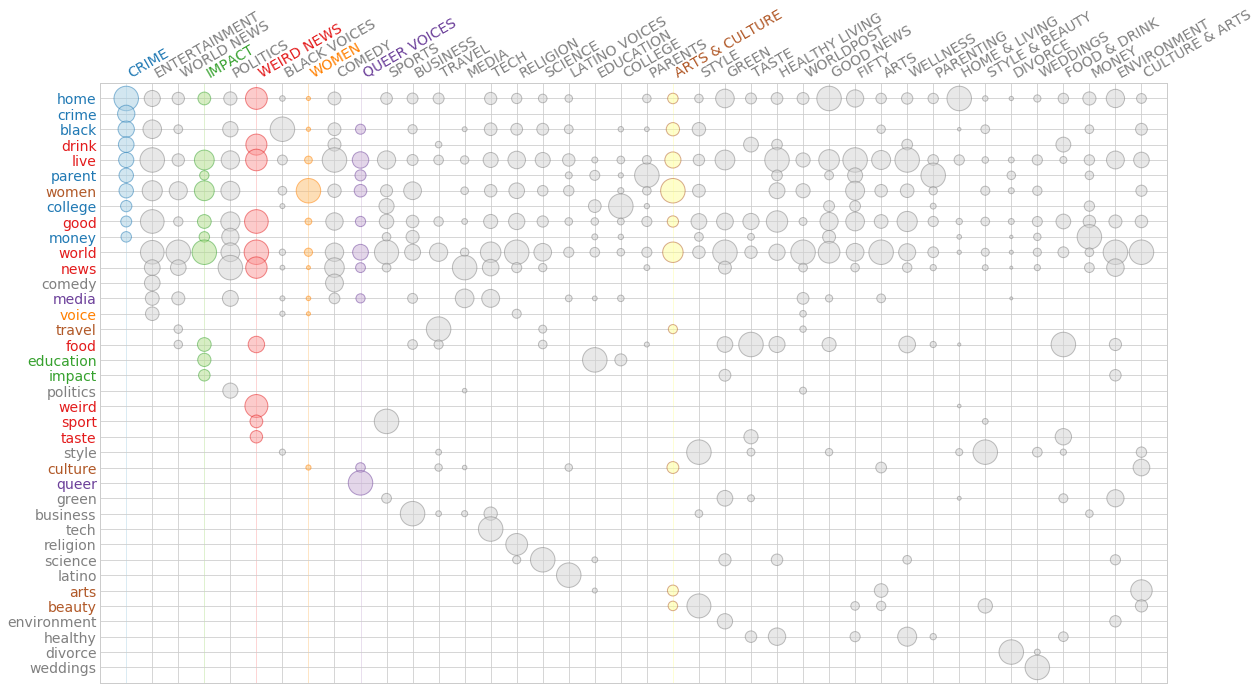

In [184]:
draw_termite_plot(np.array(data_norm.values),
                  data_top_5_words.columns,
                  data_top_5_words.index,
                  highlight_cols=[0, 3, 5, 7, 9, 21])

In [0]:
import textacy

In [0]:
def get_stat(text):
  doc = textacy.make_spacy_doc(text, lang=nlp)
  ts = textacy.TextStats(doc)
  return ts.basic_counts

In [0]:
%%time
data_news['Stats'] = data_news['text'].apply(get_stat)

In [0]:
data_news.head()

In [0]:
data_stats = pd.DataFrame(data_news['Stats'].values.tolist(),
                          index = data_news.index)
data_stats.head()


In [0]:
plt.figure(figsize=(15,10))
ax = sns.swarmplot(x="category", y="polarity", data=data_news)
ax.set_title('Sentiment in every Category')
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=60)